In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
from sewar.full_ref import uqi, psnr, rmse, ssim
import pandas as pd
sns.set()
from scipy import signal
%matplotlib inline

In [2]:
img_paths=os.listdir('train_cleaned')
img_paths=['train_cleaned/'+x for x in img_paths]
img_paths.index('train_cleaned/72.png')
cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [3]:
img_paths=os.listdir('train')
img_paths=['train/'+x for x in img_paths]
dirty_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [12]:
clean=cleaned_img[0]
dirty=dirty_img[0]

Text(0.5, 1.0, 'Clean Image')

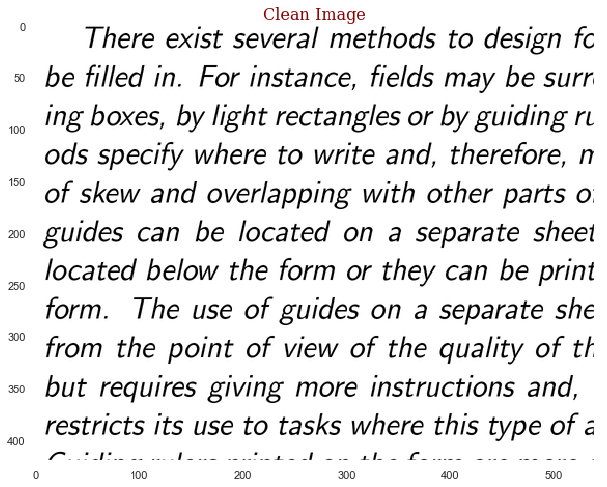

In [13]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(clean, cmap='gray')
plt.title('Clean Image', fontdict=font)

Text(0.5, 1.0, 'Clean Image')

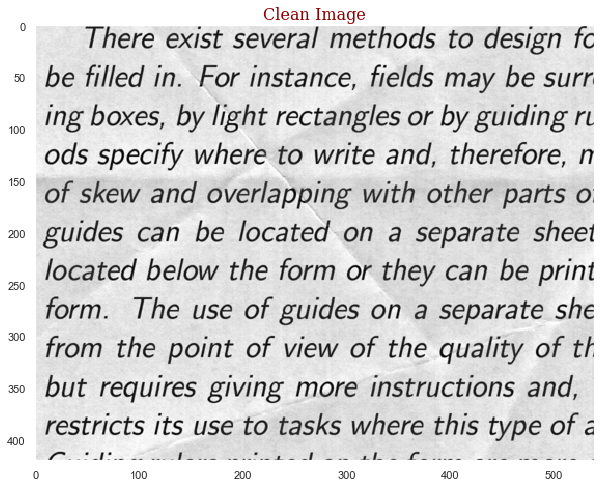

In [14]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(dirty, cmap='gray')
plt.title('Clean Image', fontdict=font)

In [15]:
dirty_flat=dirty.flatten()
x=np.reshape(dirty_flat, (dirty.shape[0]*dirty.shape[1], 1))
clean_flat=clean.flatten()
y=np.reshape(clean_flat, (clean.shape[0]*clean.shape[1]), 1)

Text(0.5, 1.0, 'Dirty Intensity v/ Clean Intensity')

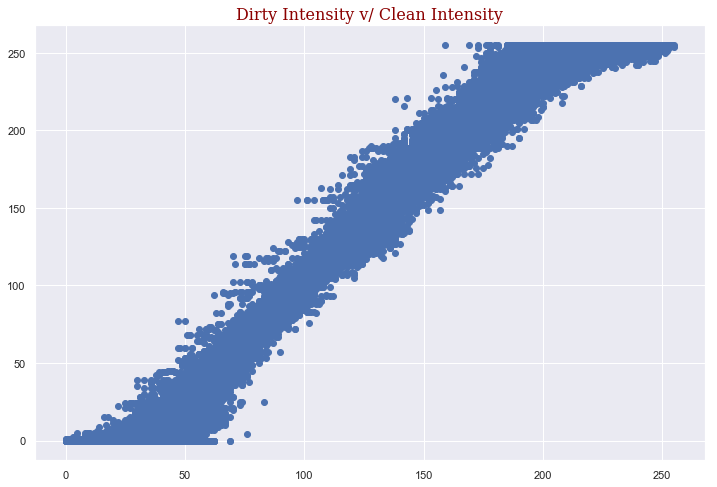

In [18]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = True
fig=plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.title('Dirty Intensity v/ Clean Intensity', fontdict=font)

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
result=regressor.predict(x)

In [35]:
result=np.reshape(result,(dirty.shape[0], dirty.shape[1]))

Text(0.5, 1.0, 'Result Image')

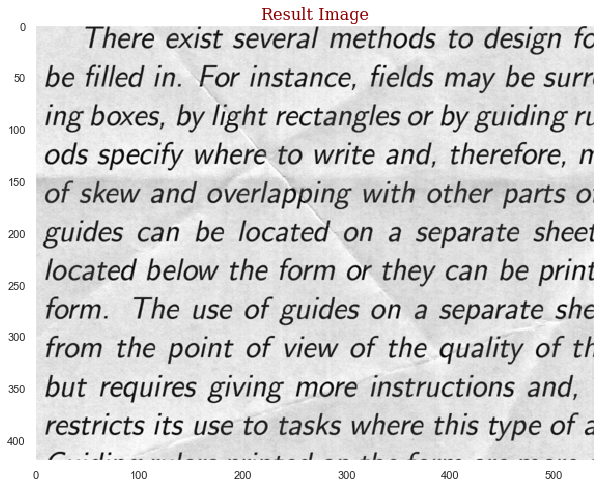

In [37]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(result, cmap='gray')
plt.title('Result Image', fontdict=font)